<a href="https://colab.research.google.com/github/vishnu-nitc/NLP-Chatbot/blob/main/vishnu_bert_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget https://raw.githubusercontent.com/vishnu-nitc/NLP-Chatbot/main/archive/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv

--2023-01-06 07:13:16--  https://raw.githubusercontent.com/vishnu-nitc/NLP-Chatbot/main/archive/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193631 (189K) [text/plain]
Saving to: ‘IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv.1’

IHMStefanini_indust 100%[===================>] 189.09K  --.-KB/s    in 0.01s   

2023-01-06 07:13:16 (12.9 MB/s) - ‘IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv.1’ saved [193631/193631]



In [8]:
# Install Transformers
!pip install transformers==3
# To get model summary
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.6/754.6 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 49.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 67.4 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=7b52a2f46cc047d8e204e4f0dbfbf49d4344a438426d596bd813a079d0694f4d
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import pandas as pd
import re
import torch
import random
import torch.nn as nn
import transformers
import matplotlib.pyplot as plt
# specify GPU


In [28]:
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [6]:
df = pd.read_csv('/content/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [11]:
df['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

converting VI also as V , since only one record


In [12]:
df.loc[df['Potential Accident Level'] == 'VI', 'Potential Accident Level'] = 'V'

In [13]:
df['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
I       49
V       32
Name: Potential Accident Level, dtype: int64

In [14]:
# Converting the Potential Accident Level into encodings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Potential_Accident_Level_Encoded'] = le.fit_transform(df['Potential Accident Level'])
# check class distribution
df['Potential_Accident_Level_Encoded'].value_counts(normalize = True)

3    0.336471
2    0.249412
1    0.223529
0    0.115294
4    0.075294
Name: Potential_Accident_Level_Encoded, dtype: float64

In [15]:
train_text, train_labels = df['Description'], df['Potential_Accident_Level_Encoded']

In [17]:
from transformers import AutoModel, BertTokenizerFast
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
# Import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [18]:
encoded_input = tokenizer(train_text[0], padding=True,truncation=True, return_tensors='pt')
print(train_text[0])
print(encoded_input)

While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
{'input_ids': tensor([[  101,  2096,  9268,  1996, 12913,  8473,  1997,  1996, 18414, 13344,
          5511,  2005,  6032,  1010,  1996, 12366, 10951,  2000, 29476,  1996,
          2490,  1997,  1996,  7783,  2430, 17629,  2000, 10956,  1996,  8208,
          1010,  3773,  2023,  1996, 15893,  6753,  2028,  2203,  2006,  1996,
         12913,  1997,  1996,  3941,  2000,  4139,  2007,  2119,  2398,  1996,
          3347,  1998, 23306,  1996,  8208,  2013,  2023,  1010,  2012,  2023,
          2617,  1996,  3347, 14816,  2013,  2049,  23

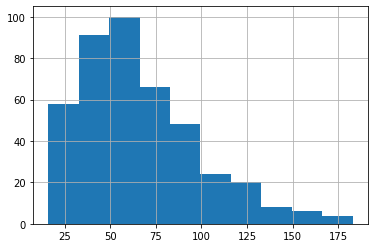

In [19]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]
pd.Series(seq_len).hist(bins = 10)


In [20]:
# Based on the histogram we are selecting the max len as 8
max_seq_len = 150

In [21]:
tokens_train = tokenizer(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

In [22]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

In [23]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
#define a batch size
batch_size = 16
# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)
# DataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [24]:
class BERT_Arch(nn.Module):
   def __init__(self, bert):      
       super(BERT_Arch, self).__init__()
       self.bert = bert 
      
       # dropout layer
       self.dropout = nn.Dropout(0.2)
      
       # relu activation function
       self.relu =  nn.ReLU()
       # dense layer
       self.fc1 = nn.Linear(768,512)
       self.fc2 = nn.Linear(512,256)
       self.fc3 = nn.Linear(256,5)
       #softmax activation function
       self.softmax = nn.LogSoftmax(dim=1)
       #define the forward pass
   def forward(self, sent_id, mask):
      #pass the inputs to the model  
      cls_hs = self.bert(sent_id, attention_mask=mask)[0][:,0]
      
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      
      x = self.fc2(x)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc3(x)
   
      # apply softmax activation
      x = self.softmax(x)
      return x

In [29]:
# freeze all the parameters. This will prevent updating of model weights during fine-tuning.
for param in bert.parameters():
      param.requires_grad = False
model = BERT_Arch(bert)
# push the model to GPU
model = model.to(device)
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
BERT_Arch                                               --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              (23,440,896)
│    │    └─Embedding: 3-2                              (393,216)
│    │    └─Embedding: 3-3                              (1,536)
│    │    └─LayerNorm: 3-4                              (1,536)
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             (85,054,464)
│    └─BertPooler: 2-3                                  --
│    │    └─Linear: 3-7                                 (590,592)
│    │    └─Tanh: 3-8                                   --
├─Dropout: 1-2                                          --
├─ReLU: 1-3                                             --
├─Linea

In [30]:
from transformers import AdamW
# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

In [33]:
from sklearn.utils.class_weight import compute_class_weight
#compute the class weights
class_wts = compute_class_weight(class_weight='balanced', classes =np.unique(train_labels), y=train_labels)
print(class_wts)

[1.73469388 0.89473684 0.80188679 0.59440559 2.65625   ]


In [34]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)
# loss function
cross_entropy = nn.NLLLoss(weight=weights) 


In [41]:
# empty lists to store training and validation loss of each epoch
train_losses=[]
# number of training epochs
#epochs = 200
epochs = 10
# We can also use learning rate scheduler to achieve better results
lr_sch = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

In [39]:
# function to train the model
def train():
  
  model.train()
  total_loss = 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step,    len(train_dataloader)))
    # push the batch to gpu
    batch = [r.to(device) for r in batch] 
    sent_id, mask, labels = batch
    # get model predictions for the current batch
    preds = model(sent_id, mask)
    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)
    # add on to the total loss
    total_loss = total_loss + loss.item()
    # backward pass to calculate the gradients
    loss.backward()
    # clip the the gradients to 1.0. It helps in preventing the    exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # update parameters
    optimizer.step()
    # clear calculated gradients
    optimizer.zero_grad()
  
    # We are not using learning rate scheduler as of now
    # lr_sch.step()
    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()
    # append the model predictions
    total_preds.append(preds)
# compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
# predictions are in the form of (no. of batches, size of batch, no. of classes).
# reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)
#returns the loss and predictions
  return avg_loss, total_preds

In [42]:
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    # append training and validation loss
    train_losses.append(train_loss)
    # it can make your experiment reproducible, similar to set  random seed to all options where there needs a random seed.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
print(f'\nTraining Loss: {train_loss:.3f}')


 Epoch 1 / 10

 Epoch 2 / 10

 Epoch 3 / 10

 Epoch 4 / 10

 Epoch 5 / 10

 Epoch 6 / 10

 Epoch 7 / 10

 Epoch 8 / 10

 Epoch 9 / 10

 Epoch 10 / 10

Training Loss: 0.626


In [47]:
def get_prediction(str):
 str = re.sub(r'[^a-zA-Z ]+', '', str)
 test_text = [str]
 model.eval()
 
 tokens_test_data = tokenizer(
 test_text,
 max_length = max_seq_len,
 pad_to_max_length=True,
 truncation=True,
 return_token_type_ids=False
 )
 test_seq = torch.tensor(tokens_test_data['input_ids'])
 test_mask = torch.tensor(tokens_test_data['attention_mask'])
 
 preds = None
 with torch.no_grad():
   preds = model(test_seq.to(device), test_mask.to(device))
 preds = preds.detach().cpu().numpy()
 preds = np.argmax(preds, axis = 1)
 print('Intent Identified: ', le.inverse_transform(preds)[0])
 return le.inverse_transform(preds)[0]
def get_class(message): 
  intent = get_prediction(message)

In [48]:
get_class("while working on my shift , I saw generator got off ")

Intent Identified:  V
